In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, linalg
from sklearn.linear_model import PoissonRegressor

In [3]:
gfr = pd.read_csv(r"./data/gfr.txt", delimiter=" ", header=None, names=["gfr"])
gfr = gfr.gfr.values

In [4]:
hist_data, hist_bin = np.histogram(gfr, bins = np.arange(13.5, 112, 3))
bin_centers = 0.5 * (hist_bin[:-1] + hist_bin[1:])

In [5]:
def get_poly(x: np.array, df: int, orth: bool = False):
    x_mat = np.transpose([np.hstack(x**k) for k in np.arange(0, df+1)])
    if orth:
        x_mat = np.linalg.qr(x_mat)[0]
        x_mat[:, 0] = 1
    columns = ["x{}".format(i) for i in range(df + 1)]
    return pd.DataFrame(x_mat, columns=columns)
    

In [6]:
def poisson_reg(x, Y, df, orth = False):
    x_mat = get_poly(x, df, orth)
    model = PoissonRegressor(alpha = 0,  max_iter=2000, fit_intercept = False)
    model.fit(x_mat, Y)
    Y_pred = model.predict(x_mat)    
    return Y_pred

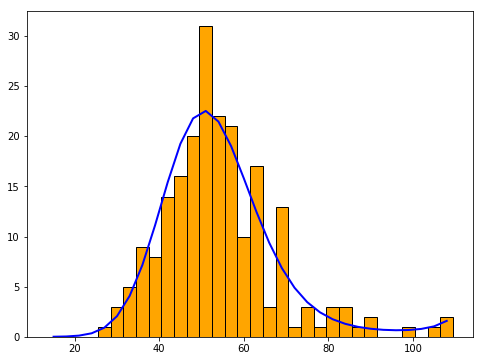

In [7]:
Y_pred = poisson_reg(bin_centers, hist_data, df = 4, orth = True)

fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(bin_centers, hist_data, width = np.diff(hist_bin), align = 'center', edgecolor = 'k', color = 'orange',  zorder = -1,)
ax.plot(bin_centers, Y_pred, color = 'b', linewidth = 2)

C:\Users\zhuoz\Anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
C:\Users\zhuoz\Anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:315: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y/y_pred) - y + y_pred)
C:\Users\zhuoz\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


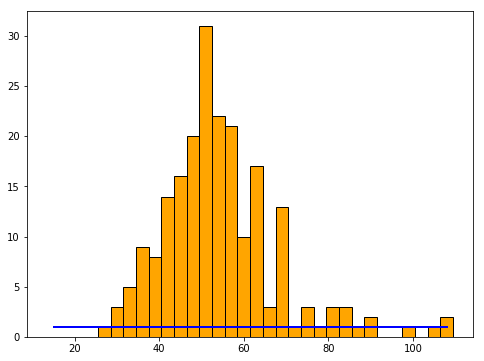

In [8]:
Y_pred = poisson_reg(bin_centers, hist_data, df = 4, orth = False)

fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(bin_centers, hist_data, width = np.diff(hist_bin), align = 'center', edgecolor = 'k', color = 'orange',  zorder = -1,)
ax.plot(bin_centers, Y_pred, color = 'b', linewidth = 2)

**Takeaway**: to use the PoissonRegressor, the orthed data need to be used. 